**Theoretical Questions**

1.What is unsupervised learning in the context of machine learning?

Ans:Unsupervised learning is a type of ML where the model works with unlabeled data. The goal is to discover hidden patterns, structures, or groupings in the data without knowing the correct output beforehand (e.g., clustering, dimensionality reduction).

2.How does K-Means clustering algorithm work?
     
Ans: K-Means:

1.Chooses K initial centroids

2.Assigns each data point to the nearest centroid

3.Recalculates centroids as the mean of assigned points

4.Repeats steps 2–3 until centroids stop changing or convergence is reached


3.Explain the concept of a dendrogram in hierarchical clustering?

  Ans: A dendrogram is a tree-like diagram that visually represents how data points or clusters are merged (or split) at different distance levels during hierarchical clustering.

4.What is the main difference between K-Means and Hierarchical Clustering?

Ans: K-Means: Requires pre-defined number of clusters (K)

Hierarchical: Does not require K upfront and builds a full cluster hierarchy

5.What are the advantages of DBSCAN over K-Means?

Ans: No need to specify number of clusters

Can find arbitrarily shaped clusters

Identifies noise and outliers explicitly

Handles varying cluster densities better (to some extent)

6.When would you use Silhouette Score in clustering?

Ans: When you want to evaluate clustering quality by measuring how well each point fits within its cluster compared to other clusters—especially useful when choosing K.

7.What are the limitations of Hierarchical Clustering?

Ans:
Computationally expensive (poor scalability)

Sensitive to noise and outliers

Once clusters are merged/split, it cannot undo them

8.Why is feature scaling important in clustering algorithms like K-Means?

Ans: Because K-Means uses distance calculations, features with larger scales can dominate and bias the clustering if data is not normalized or standardized

9.How does DBSCAN identify noise points?

Ans: Points that do not have enough neighbors within a given radius (ε) are labeled as noise (outliers).

10.Define inertia in the context of K-Means?

Ans: Inertia is the sum of squared distances between data points and their assigned cluster centroids. Lower inertia means tighter clusters.

11.What is the elbow method in K-Means clustering?

Ans: A technique to choose K by plotting inertia vs. number of clusters and selecting the point where the decrease in inertia starts to slow down (the “elbow”).

12.Describe the concept of "density" in DBSCAN?

Ans: Density refers to the number of points within a given radius (ε). High-density areas form clusters.

13.Can hierarchical clustering be used on categorical data?

Ans: Yes, if an appropriate distance metric (e.g., Hamming or Jaccard distance) is used

14.What does a negative Silhouette Score indicate?

Ans: The data point is closer to another cluster than its own, suggesting poor clustering.

15.Explain the term "linkage criteria" in hierarchical clustering?

Ans: It defines how the distance between clusters is calculated, such as:

Single linkage

Complete linkage

Average linkage

Ward’s method

16.Why might K-Means clustering perform poorly on data with  varfing cluster sizes or densities?

Ans: Because it assumes clusters are spherical, equally sized, and evenly dense, which isn’t always true in real data.

17.What are the core parameters in DBSCAN, and how do they influence clustering?

Ans: ε (epsilon): Radius for neighborhood search

minPts: Minimum points required to form a dense region
Together, they control cluster formation and noise detection.

18.How does K-Means++ improve upon standard K-Means initialization?

Ans: It initializes centroids more strategically and spread out, reducing convergence time and improving clustering quality.

19.What is agglomerative clustering?

Ans: A bottom-up hierarchical approach where each data point starts as its own cluster, and clusters are repeatedly merged.

20.What makes Silhouette Score a better metric than just inertia for model evaluation?

Ans: Because Silhouette Score considers both cluster compactness and separation, while inertia only measures compactness.

**Practical Questions**

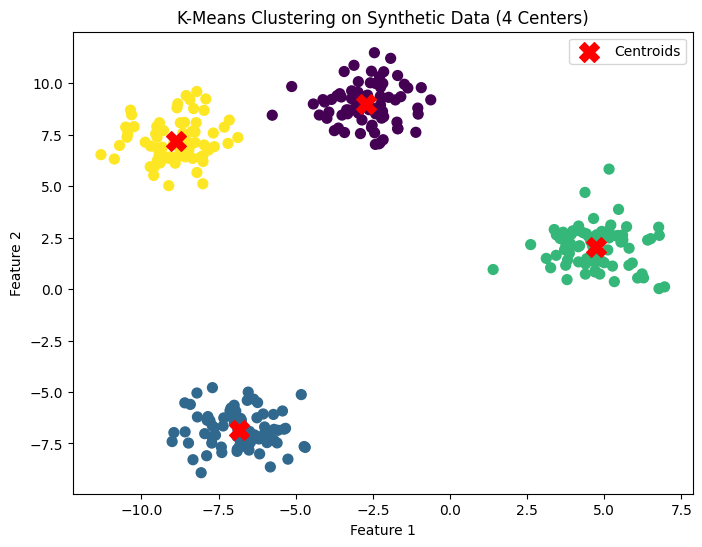

In [1]:
#Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title("K-Means Clustering on Synthetic Data (4 Centers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
#Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted labels:")
print(labels[:10])


First 10 predicted labels:
[1 1 1 1 1 1 1 1 1 1]


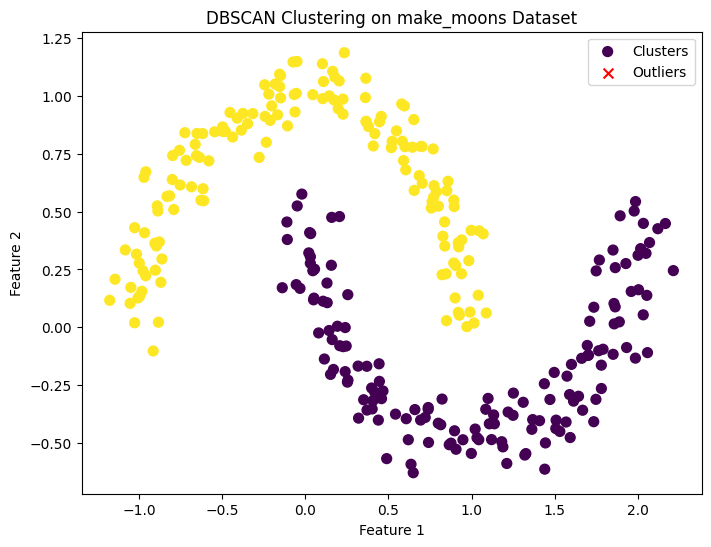

In [3]:
#Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic moon-shaped data
X, y = make_moons(n_samples=300, noise=0.08, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (noise points labeled as -1)
outliers = labels == -1
clusters = labels != -1

# Plot the results
plt.figure(figsize=(8, 6))

# Plot clustered points
plt.scatter(
    X[clusters, 0],
    X[clusters, 1],
    c=labels[clusters],
    cmap='viridis',
    s=50,
    label='Clusters'
)

# Plot outliers
plt.scatter(
    X[outliers, 0],
    X[outliers, 1],
    c='red',
    s=50,
    marker='x',
    label='Outliers'
)

plt.title("DBSCAN Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [4]:
#Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (3 clusters for Wine dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


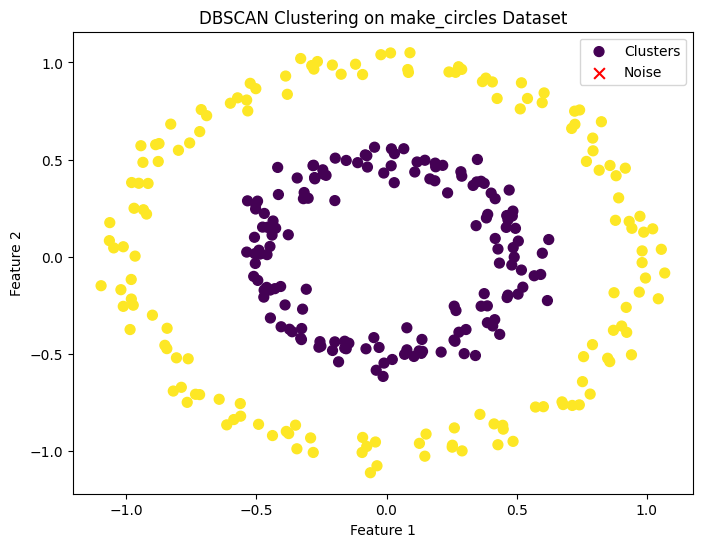

In [5]:
#Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# Generate circular synthetic data
X, y = make_circles(
    n_samples=300,
    noise=0.05,
    factor=0.5,
    random_state=42
)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify noise points
noise = labels == -1
clusters = labels != -1

# Plot the results
plt.figure(figsize=(8, 6))

# Plot clusters
plt.scatter(
    X[clusters, 0],
    X[clusters, 1],
    c=labels[clusters],
    cmap='viridis',
    s=50,
    label='Clusters'
)

# Plot noise points
plt.scatter(
    X[noise, 0],
    X[noise, 1],
    c='red',
    marker='x',
    s=60,
    label='Noise'
)

plt.title("DBSCAN Clustering on make_circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [6]:
#Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Apply MinMax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output cluster centroids
centroids = kmeans.cluster_centers_

print("Cluster centroids:")
print(centroids)


Cluster centroids:
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


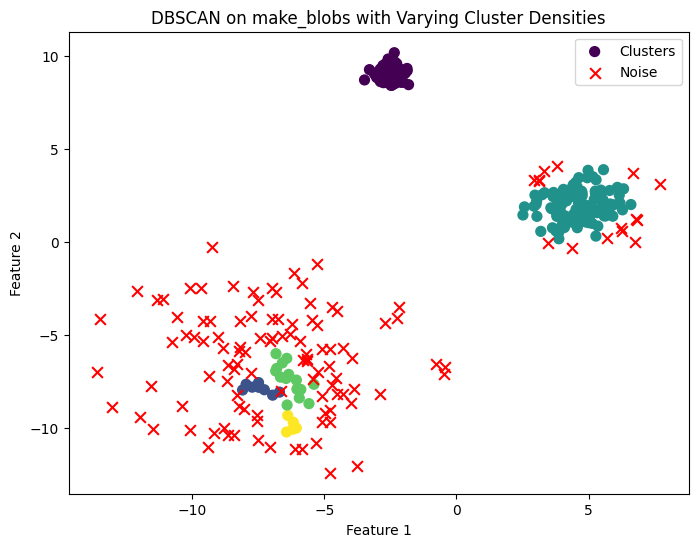

In [7]:
#Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(
    n_samples=400,
    centers=3,
    cluster_std=[0.3, 1.0, 2.5],  # varying densities
    random_state=42
)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify noise points
noise = labels == -1
clusters = labels != -1

# Plot the results
plt.figure(figsize=(8, 6))

# Plot clustered points
plt.scatter(
    X[clusters, 0],
    X[clusters, 1],
    c=labels[clusters],
    cmap='viridis',
    s=50,
    label='Clusters'
)

# Plot noise points
plt.scatter(
    X[noise, 0],
    X[noise, 1],
    c='red',
    marker='x',
    s=60,
    label='Noise'
)

plt.title("DBSCAN on make_blobs with Varying Cluster Densities")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


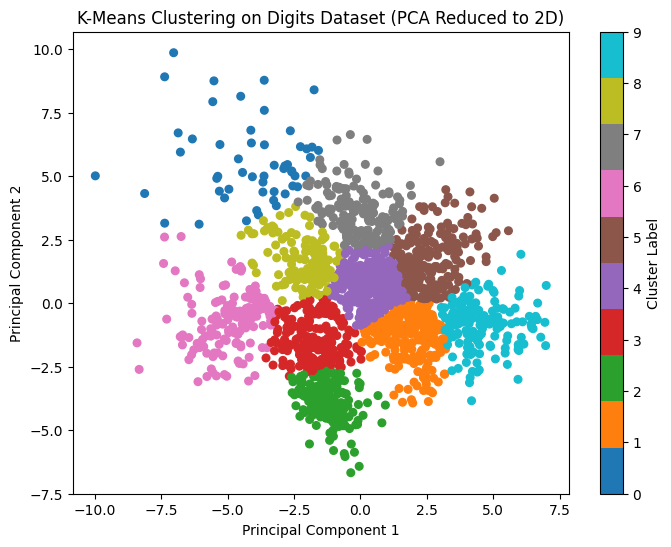

In [8]:
#Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data

# (Optional but recommended) Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering (10 clusters for digits 0–9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap='tab10',
    s=30
)

plt.title("K-Means Clustering on Digits Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


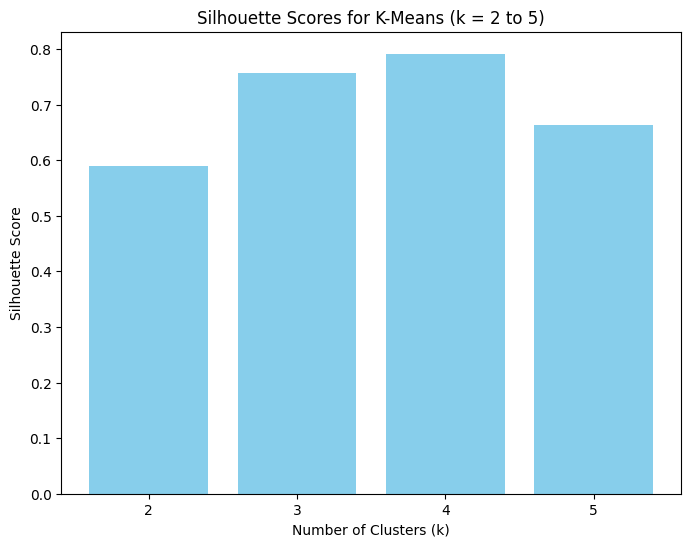

In [9]:
#Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Range of k values
k_values = range(2, 6)
silhouette_scores = []

# Compute silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means (k = 2 to 5)")
plt.xticks(k_values)
plt.show()


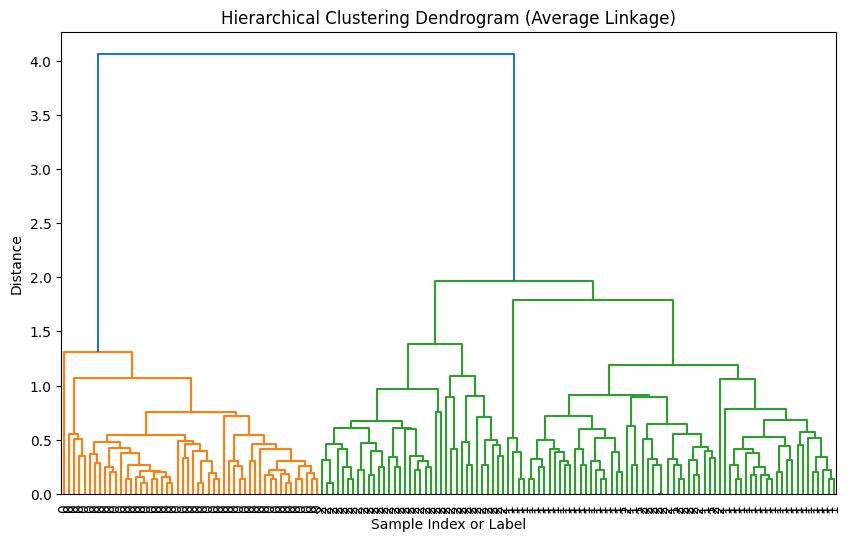

In [10]:
#Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Compute linkage matrix using average linkage
Z = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=iris.target,  # optional: show true labels
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0.7*max(Z[:,2])  # optional coloring
)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index or Label")
plt.ylabel("Distance")
plt.show()


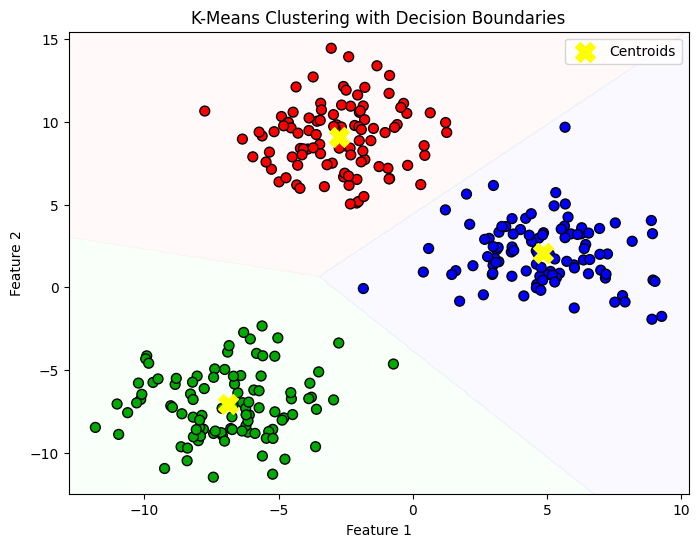

In [11]:
#Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Generate synthetic data with overlapping clusters
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=2.0,  # larger std → overlapping clusters
    random_state=42
)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Create a meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
cmap_background = ListedColormap(['#FFEEEE', '#EEFFEE', '#EEEEFF'])
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Plot data points colored by cluster
cmap_points = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap=cmap_points, edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


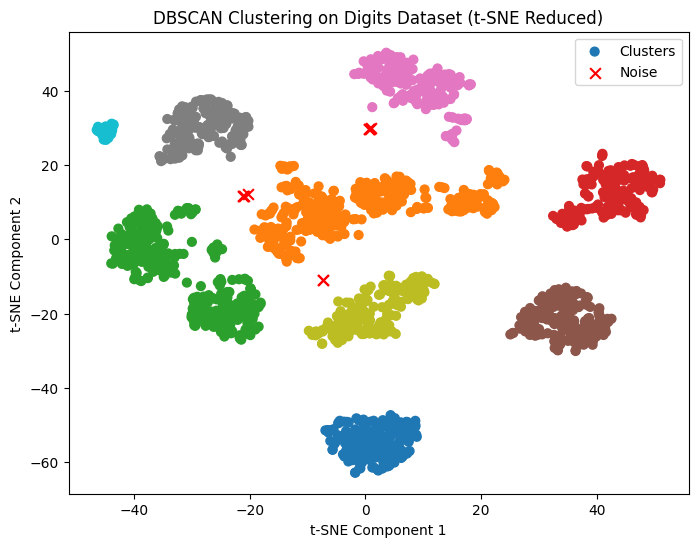

In [12]:
# Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Identify noise points
noise = labels == -1
clusters = labels != -1

# Plot the results
plt.figure(figsize=(8, 6))

# Plot clusters
plt.scatter(
    X_tsne[clusters, 0],
    X_tsne[clusters, 1],
    c=labels[clusters],
    cmap='tab10',
    s=40,
    label='Clusters'
)

# Plot noise points
plt.scatter(
    X_tsne[noise, 0],
    X_tsne[noise, 1],
    c='red',
    marker='x',
    s=60,
    label='Noise'
)

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


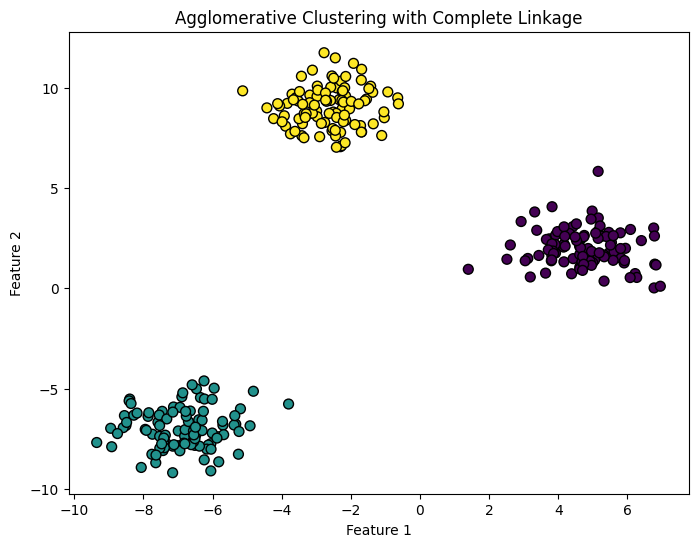

In [13]:
 #Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
 import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

# Apply Agglomerative Clustering with complete linkage
agglo = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglo.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    edgecolor='k'
)

plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


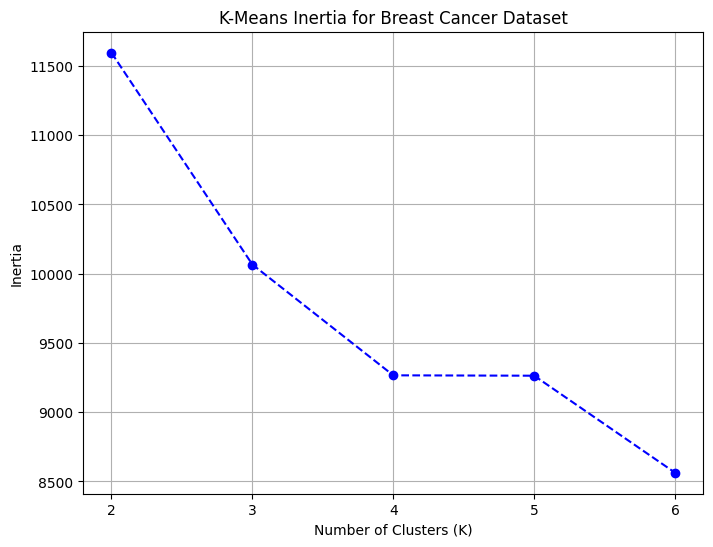

In [14]:
#Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of K values
k_values = range(2, 7)
inertia_values = []

# Compute inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot inertia vs K
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='blue')
plt.title("K-Means Inertia for Breast Cancer Dataset")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


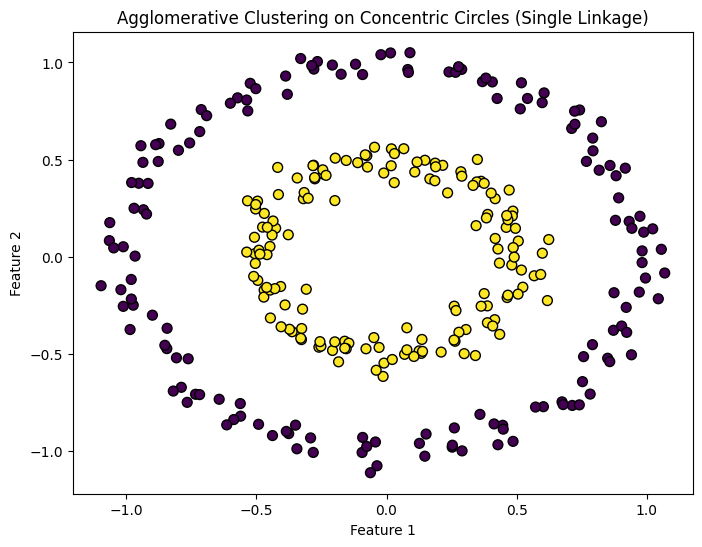

In [15]:
#Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate concentric circles data
X, y = make_circles(
    n_samples=300,
    noise=0.05,
    factor=0.5,
    random_state=42
)

# Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    edgecolor='k'
)

plt.title("Agglomerative Clustering on Concentric Circles (Single Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [16]:
#Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise6
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters (excluding noise): 0
Number of noise points: 178


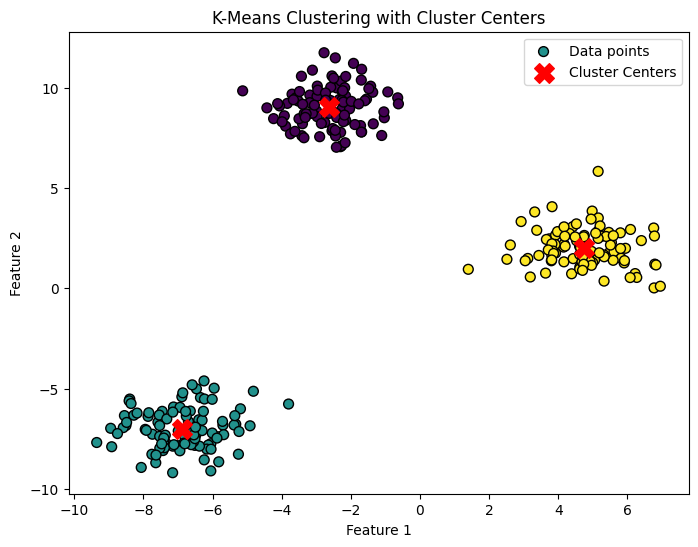

In [17]:
#Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', label='Data points')

# Plot cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [18]:
#Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)  # eps may need tuning
labels = dbscan.fit_predict(X_scaled)

# Count noise points
n_noise = np.sum(labels == -1)

print(f"Number of noise points identified by DBSCAN: {n_noise}")


Number of noise points identified by DBSCAN: 4


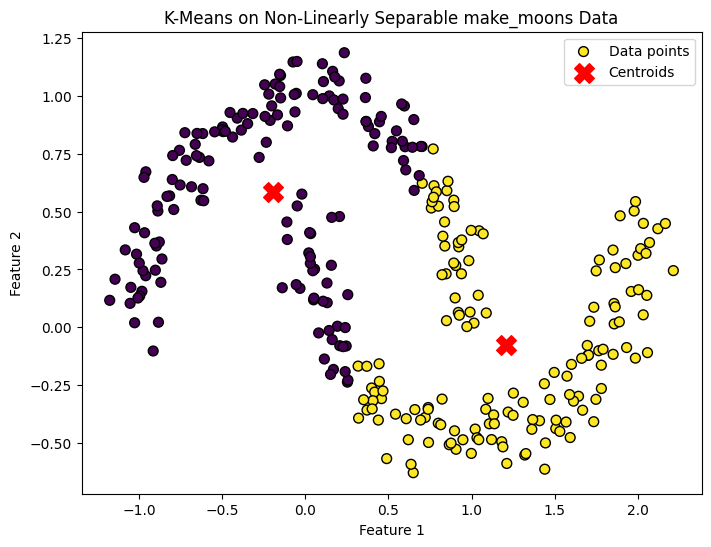

In [19]:
#Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Generate moon-shaped synthetic data
X, y_true = make_moons(n_samples=300, noise=0.08, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', label='Data points')

# Plot cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means on Non-Linearly Separable make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


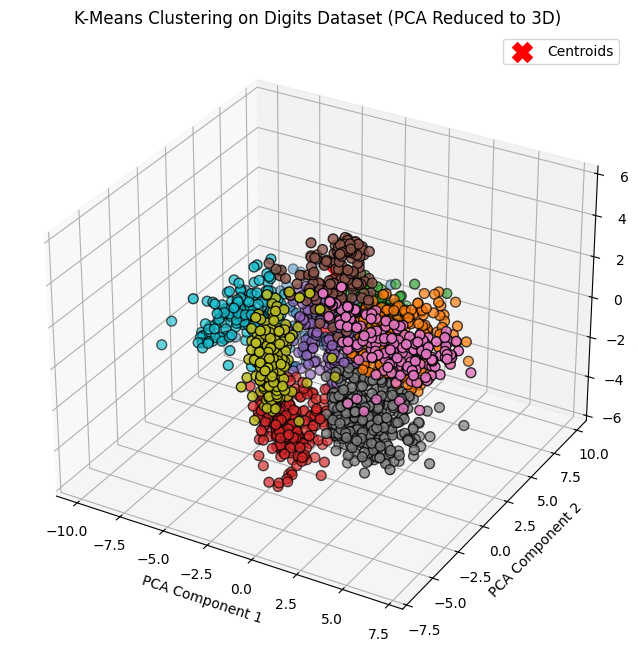

In [20]:
# Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 3 dimensions using PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means (10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points colored by cluster label
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels,
    cmap='tab10',
    s=50,
    edgecolor='k'
)

# Plot cluster centroids
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

ax.set_title("K-Means Clustering on Digits Dataset (PCA Reduced to 3D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()


In [21]:
#Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 5 centers
X, y_true = make_blobs(
    n_samples=500,
    centers=5,
    cluster_std=1.0,
    random_state=42
)

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate clustering using Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score for K-Means with 5 clusters: {score:.4f}")


Silhouette Score for K-Means with 5 clusters: 0.6787


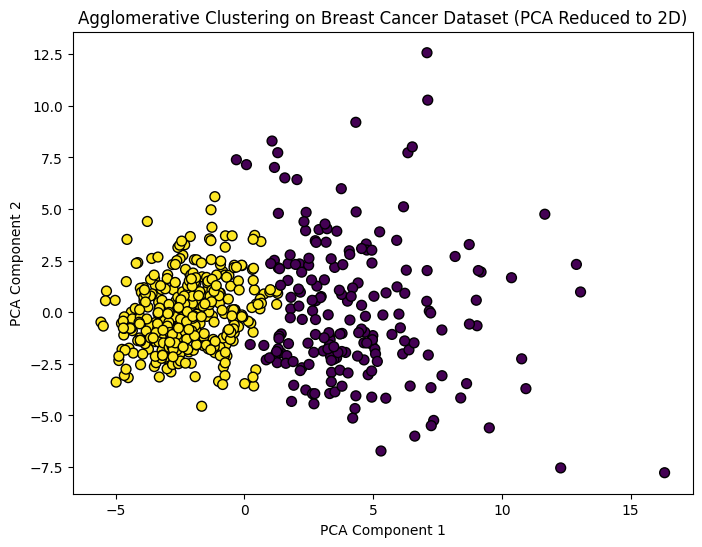

In [22]:
#Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering (2 clusters for malignant vs benign)
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    edgecolor='k'
)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


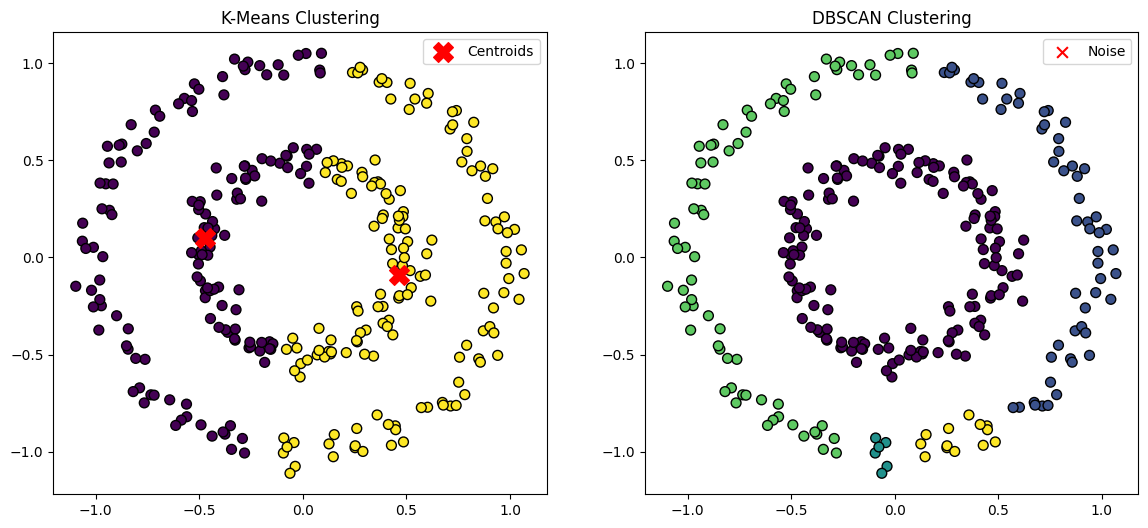

In [23]:
# Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Generate noisy circular data
X, y_true = make_circles(
    n_samples=300,
    noise=0.05,
    factor=0.5,
    random_state=42
)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
axes[0].set_title("K-Means Clustering")
axes[0].legend()

# DBSCAN plot
import numpy as np
noise = dbscan_labels == -1
clusters = dbscan_labels != -1
axes[1].scatter(X[clusters, 0], X[clusters, 1], c=dbscan_labels[clusters], cmap='viridis', s=50, edgecolor='k')
axes[1].scatter(X[noise, 0], X[noise, 1], c='red', marker='x', s=60, label='Noise')
axes[1].set_title("DBSCAN Clustering")
axes[1].legend()

plt.show()


Average Silhouette Score: 0.5512


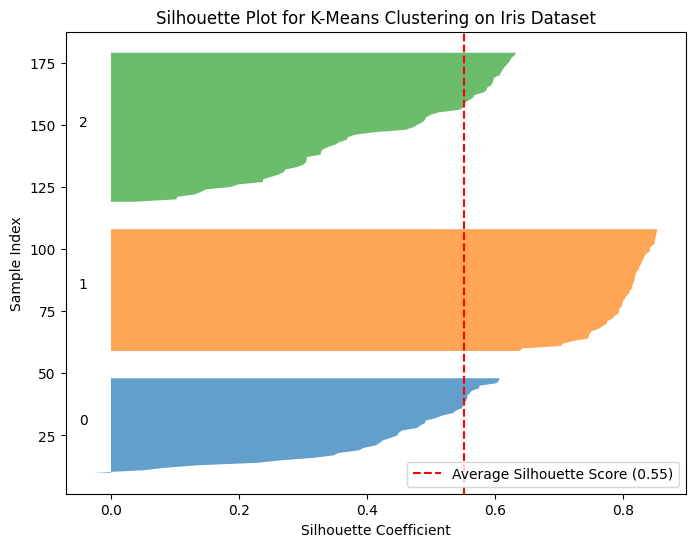

In [24]:
# Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Compute Silhouette Coefficient for each sample
sample_silhouette_values = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)
print(f"Average Silhouette Score: {avg_score:.4f}")

# Plot Silhouette Coefficient for each sample
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(3):
    ith_cluster_values = sample_silhouette_values[labels == i]
    ith_cluster_values.sort()
    size_cluster = ith_cluster_values.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # space between clusters

plt.axvline(x=avg_score, color="red", linestyle="--", label=f"Average Silhouette Score ({avg_score:.2f})")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Sample Index")
plt.title("Silhouette Plot for K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()


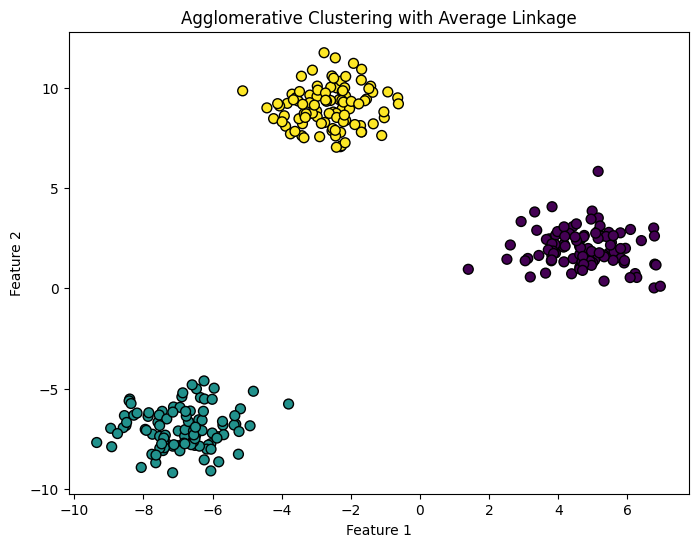

In [25]:
#Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

# Apply Agglomerative Clustering with average linkage
agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglo.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    edgecolor='k'
)
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


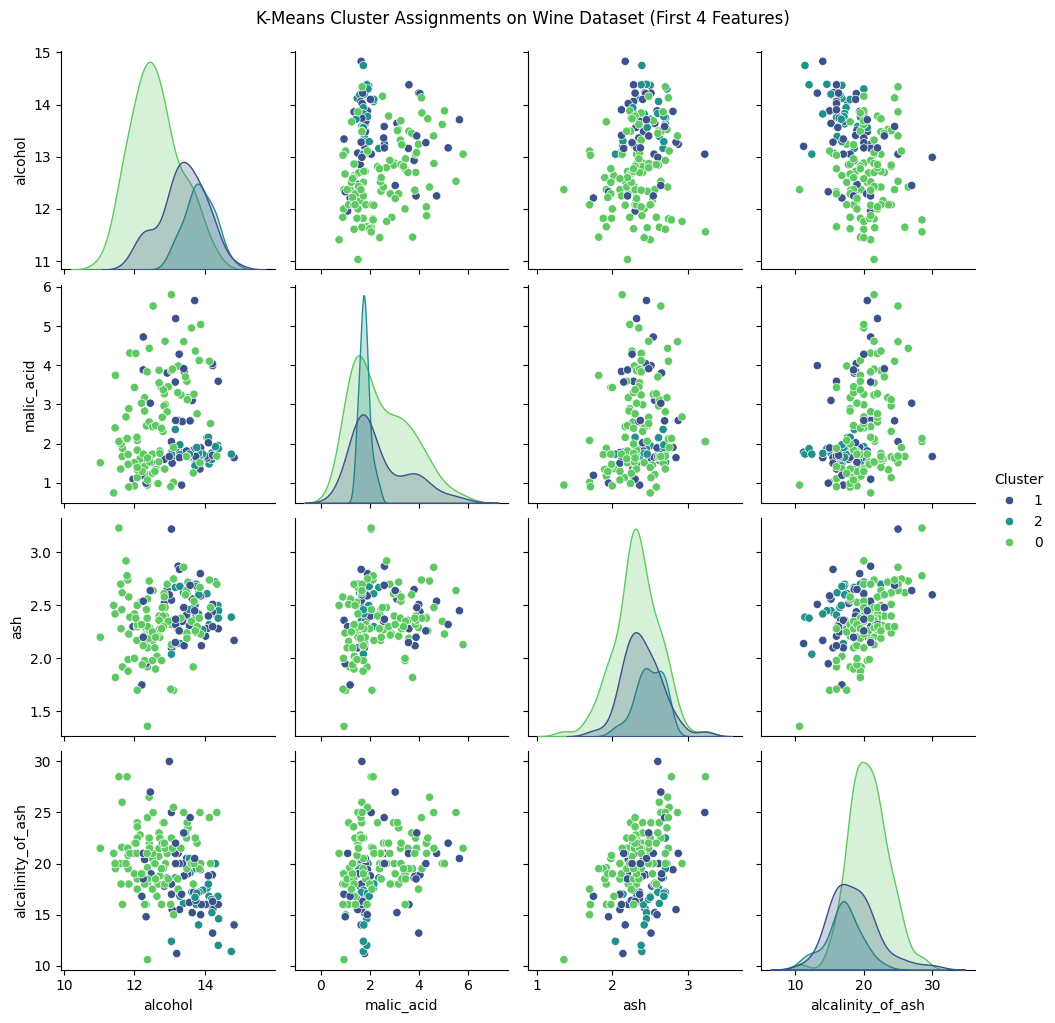

In [26]:
# Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# Load the Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels.astype(str)  # for coloring in Seaborn

# Visualize with pairplot (first 4 features)
sns.pairplot(df.iloc[:, :4].assign(Cluster=df['Cluster']), hue='Cluster', palette='viridis')
plt.suptitle("K-Means Cluster Assignments on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [27]:
# Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate noisy blobs
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=[0.5, 1.5, 2.0],  # varying density → some noise
    random_state=42
)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters (excluding noise): 6
Number of noise points: 46


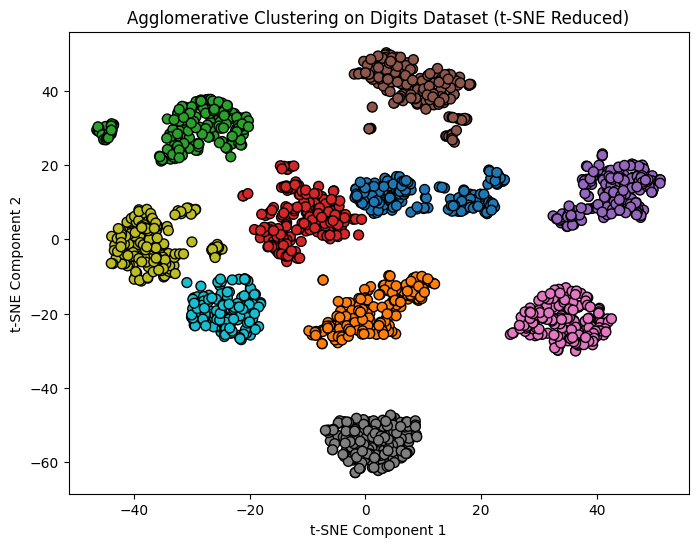

In [28]:
# Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_tsne)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=labels,
    cmap='tab10',
    s=50,
    edgecolor='k'
)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
